# Advanced Regression - Assignment - Part I
Submitted by Vedavyas Burli
## Problem statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

## Business Goal 

1. You are required to model the price of houses with the available independent variables. 
2. This model will then be used by the management to understand how exactly the prices vary with the variables. 
3. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. 

Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
#Import required packages
import numpy as np
import pandas as pd
pd.options.display.max_columns = 200

import  matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

### 1. Data Understanding

In [2]:
housing = pd.read_csv('train.csv')
housing.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [3]:
print('Shape of dataset',housing.shape)
print('\n')
print('Information: ')
print(housing.info())

Shape of dataset (1460, 81)


Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQ

In [4]:
#Check if any null values present in column/rows
housing.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [5]:
print('Describe')
housing.describe()

Describe


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
#No duplicate values in data set
housing[housing.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


#### <font color=red>Outcome of data understanding:</font>
1. Dataset has Shape of dataset 1460 rows(records) and 81 columns (attributes).
2. dtypes of attributes: float64(3), int64(35), object(43)
3. It is been observed that there are certain columns which need to be removed due to NaN data
4. No duplicate entries found

## 2. Data cleaning
#### Removing/Imputing NaN values in Categorical attributes

In [7]:
print('Checking NULL values in all columns')
print(housing.isnull().sum().sort_values(ascending=False).head(20))

Checking NULL values in all columns
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64


In [8]:
print('The following columns that have more than 85% values associated to a specific value')
print(round(100*(housing.select_dtypes(include='object').isnull().sum()/len(housing.index)), 2).sort_values(ascending=False).head(18))

The following columns that have more than 85% values associated to a specific value
PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
GarageCond       5.55
GarageQual       5.55
GarageFinish     5.55
GarageType       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtQual         2.53
BsmtCond         2.53
MasVnrType       0.55
Electrical       0.07
Condition2       0.00
Condition1       0.00
dtype: float64


#### Replace NA with None in the following columns below:-

In [9]:
for col in ('PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MasVnrType' 
            ,'Electrical'):
    housing[col] = housing[col].fillna('None')

#### Remove the columns that have more than 85% values associated toa specific value
- Remove the columns with skewed data

In [10]:
cat_col = housing.select_dtypes(include=['object'])
for col in (cat_col):
    if(housing[col].value_counts().max() >= 1241):
        housing.drop(col, axis = 1, inplace = True)

In [11]:
#Check if any NUll values present in categorical column of  data set
round(100*(housing.select_dtypes(include='object').isnull().sum()/len(housing.index)), 2).sort_values(ascending=False).head(18)

SaleCondition    0.0
Fence            0.0
LotShape         0.0
LotConfig        0.0
Neighborhood     0.0
BldgType         0.0
HouseStyle       0.0
RoofStyle        0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
ExterQual        0.0
Foundation       0.0
BsmtQual         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
HeatingQC        0.0
KitchenQual      0.0
dtype: float64

<font color=red>Outcome of data cleaning:</font>
    - No more null values in the categorical variables 

#### Removing NULL values in Numerical attributes

In [12]:
round(100*(housing.select_dtypes(include=['int64','float']).isnull().sum()/len(housing.index)), 2).sort_values(ascending=False).head(5)

LotFrontage     17.74
GarageYrBlt      5.55
MasVnrArea       0.55
BsmtFinSF1       0.00
LowQualFinSF     0.00
dtype: float64

In [13]:
# Impute the null values with median values for LotFrontage and MasVnrArea columns
housing['MasVnrArea'] = housing['MasVnrArea'].replace(np.nan, housing['MasVnrArea'].median())
housing['LotFrontage'] = housing['LotFrontage'].replace(np.nan, housing['LotFrontage'].median())

# Setting the null values with 0 for GarageYrBlt for now as we would be handling this column further below

housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna(0)
housing['GarageYrBlt'] = housing['GarageYrBlt'].astype(int)

In [14]:
housing.shape

(1460, 60)

#### Create new column to determine house has been remodelled or not
- We will be able to determine based on built year and remodelled year difference

In [15]:
#Check if built year and remodelled year 
def checkforModel(X):
    if(X['YearBuilt'] == X['YearRemodAdd']):
        return 0
    elif(X['YearBuilt'] < X['YearRemodAdd']):
        return 1
    else:
        return 2
    
housing['IsRemodelled'] = housing.apply(checkforModel, axis=1)
housing.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,None,Attchd,2003,RFn,2,548,0,61,0,0,0,0,None,0,2,2008,Normal,208500,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976,RFn,2,460,298,0,0,0,0,0,None,0,5,2007,Normal,181500,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001,RFn,2,608,0,42,0,0,0,0,None,0,9,2008,Normal,223500,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998,Unf,3,642,0,35,272,0,0,0,None,0,2,2006,Abnorml,140000,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000,RFn,3,836,192,84,0,0,0,0,None,0,12,2008,Normal,250000,0


In [16]:
housing.shape

(1460, 61)

#### Create a new column which would indicate if the Garage is old or new.
 - Garage Yr Built less than 2000 will be considered as old (0) else new(1). 
 
 Note: the value as 0 will also be treated as old


In [17]:
#Check if  garage built year is between 1900 and 2000
def oldOrNew(x):
    if x == 0:
        return 0
    elif x >= 1900 and x < 2000:        
        return 0
    else:   
        return 1
    
housing['OldOrNewGarage'] = housing['GarageYrBlt'].apply(oldOrNew)
housing.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,None,Attchd,2003,RFn,2,548,0,61,0,0,0,0,None,0,2,2008,Normal,208500,0,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976,RFn,2,460,298,0,0,0,0,0,None,0,5,2007,Normal,181500,0,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001,RFn,2,608,0,42,0,0,0,0,None,0,9,2008,Normal,223500,1,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998,Unf,3,642,0,35,272,0,0,0,None,0,2,2006,Abnorml,140000,1,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000,RFn,3,836,192,84,0,0,0,0,None,0,12,2008,Normal,250000,0,1


In [18]:
housing.shape

(1460, 62)

#### Determine the age of the building at the time of selling.Create a new column named BuiltOrRemodelledAge.

In [19]:
#Check if age of builiding at the time of selling
def builtOrRemodelAge(x):
    if(x['YearBuilt'] == x['YearRemodAdd']):
        return x['YrSold'] - x['YearBuilt']
    else:
        return x['YrSold'] - x['YearRemodAdd']
       
housing['BuiltOrRemodelAge'] = housing.apply(builtOrRemodelAge, axis=1)
housing.head()  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,OldOrNewGarage,BuiltOrRemodelAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,None,Attchd,2003,RFn,2,548,0,61,0,0,0,0,None,0,2,2008,Normal,208500,0,1,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976,RFn,2,460,298,0,0,0,0,0,None,0,5,2007,Normal,181500,0,0,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001,RFn,2,608,0,42,0,0,0,0,None,0,9,2008,Normal,223500,1,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998,Unf,3,642,0,35,272,0,0,0,None,0,2,2006,Abnorml,140000,1,0,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000,RFn,3,836,192,84,0,0,0,0,None,0,12,2008,Normal,250000,0,1,8


In [20]:
housing.shape

(1460, 63)

#### Drop columns we can drop these columns Y earBuilt, YearRemodAdd, YrSold and GarageYrBlt as we  would only be using the derived columns for further analysis

In [21]:
housing.drop(['GarageYrBlt','YearRemodAdd','YearBuilt','YrSold'], axis = 1, inplace = True)

In [22]:
round(100*(housing.select_dtypes(include=['int64','float']).isnull().sum()/len(housing.index)), 2).sort_values(ascending=False).head(5)

BuiltOrRemodelAge    0.0
FullBath             0.0
BsmtFullBath         0.0
GrLivArea            0.0
LowQualFinSF         0.0
dtype: float64

<font color=red>Outcome of data cleaning: Numerical</font>
    - No more null values in the Numerical variables 

#### Remove the columns that have more than 85% values associated to a specific value
- Remove the columns with skewed data

In [23]:
housing['MoSold'].value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

In [24]:
num_col = housing.select_dtypes(include=['int64', 'float'])
for col in (num_col):
    if(housing[col].value_counts().max() >= 1241):
        housing.drop(col, axis = 1, inplace = True)

housing.drop(['MoSold'], axis = 1, inplace = True)

housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,OldOrNewGarage,BuiltOrRemodelAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,None,Attchd,RFn,2,548,0,61,None,Normal,208500,0,1,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,RFn,2,460,298,0,None,Normal,181500,0,0,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,RFn,2,608,0,42,None,Normal,223500,1,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,Unf,3,642,0,35,None,Abnorml,140000,1,0,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,RFn,3,836,192,84,None,Normal,250000,0,1,8


In [25]:
housing.shape

(1460, 49)

In [26]:
#Check null values in percentage after data cleaning 
round(100*(housing.isnull().sum()/len(housing.index)), 2).sort_values(ascending=False)

BuiltOrRemodelAge    0.0
BsmtUnfSF            0.0
BsmtFinType1         0.0
BsmtExposure         0.0
BsmtQual             0.0
Foundation           0.0
ExterQual            0.0
MasVnrArea           0.0
MasVnrType           0.0
Exterior2nd          0.0
Exterior1st          0.0
RoofStyle            0.0
OverallCond          0.0
OverallQual          0.0
HouseStyle           0.0
BldgType             0.0
Neighborhood         0.0
LotConfig            0.0
LotShape             0.0
LotArea              0.0
LotFrontage          0.0
MSZoning             0.0
MSSubClass           0.0
BsmtFinSF1           0.0
TotalBsmtSF          0.0
OldOrNewGarage       0.0
HeatingQC            0.0
IsRemodelled         0.0
SalePrice            0.0
SaleCondition        0.0
Fence                0.0
OpenPorchSF          0.0
WoodDeckSF           0.0
GarageArea           0.0
GarageCars           0.0
GarageFinish         0.0
GarageType           0.0
FireplaceQu          0.0
Fireplaces           0.0
TotRmsAbvGrd         0.0


<font color='red'>Overall Outcome of data cleaning:</font>

- After data cleaning we have 1460 rows and  49 columns 
- No NULL values in dataset
- No duplicate entries found.

In [27]:
housing.shape

(1460, 49)

#### Outlier Treatment
- Checking outliers at 25%,50%,75%,90%,95% and above

In [28]:
housing.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,OldOrNewGarage,BuiltOrRemodelAge
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,1.565068,0.382877,2.866438,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,0.476712,0.275342,22.950000
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.550916,0.502885,0.815778,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,0.499629,0.446840,20.640653
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,0.000000,-1.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,0.000000,0.000000,4.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,3.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,0.000000,0.000000,14.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,2.000000,1.000000,3.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,1.000000,1.000000,41.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,1680.000000,954.200000,2158.300000,1.000000,2.000000,1.000000,4.000000,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,1.000000,1.000000,56.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,1831.250000,1141.050000,2466.100000,1.000000,2.000000,1.000000,4.000000,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,1.000000,1.000000,58.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,2219.460000,1418.920000,3123.480000,2.000000,3.000000,1.000000,5.000000,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,442567.010000,1.000000,1.000000,60.000000


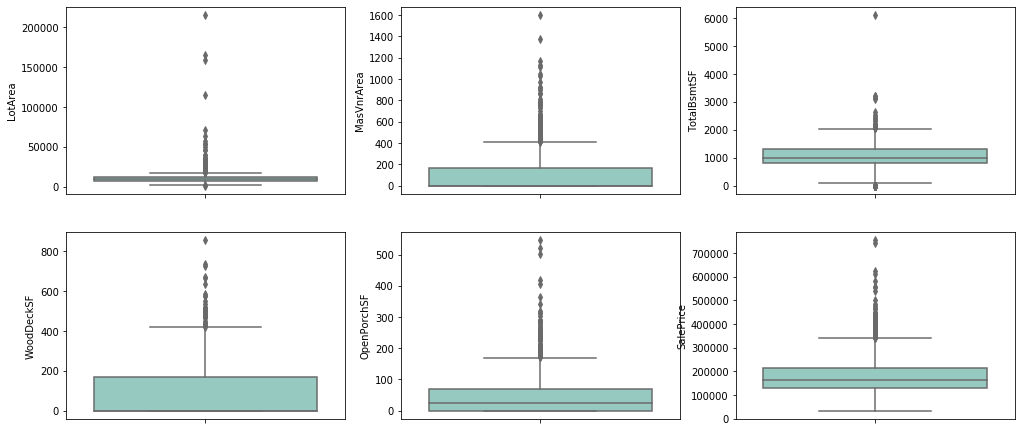

In [29]:
# Check the outliers in all the numeric columns
data = housing
plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = data)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = data)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = data)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = data)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = data)
plt.subplot(5,3,6)
sns.boxplot(y = 'SalePrice', palette='Set3', data = data)
plt.show()


In [30]:
# Removing values beyond 98% for LotArea
quartile_LotArea = housing['LotArea'].quantile(0.98)
housing = housing[housing["LotArea"] < quartile_LotArea]

# Removing values beyond 98% for MasVnrArea
quartile_MasVnrArea = housing['MasVnrArea'].quantile(0.98)
housing = housing[housing["MasVnrArea"] < quartile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF
quartile_TotalBsmtSF = housing['TotalBsmtSF'].quantile(0.99)
housing = housing[housing["TotalBsmtSF"] < quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF
quartile_WoodDeckSF = housing['WoodDeckSF'].quantile(0.99)
housing = housing[housing["WoodDeckSF"] < quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF
quartile_OpenPorchSF = housing['OpenPorchSF'].quantile(0.99)
housing = housing[housing["OpenPorchSF"] < quartile_OpenPorchSF]

#### Determine the percentage of data retained

In [31]:
per_data = round(100*(len(housing)/1460),2)
print(per_data)

93.01


## 3. Data Visulaization
- Perform Distribution plot, pairplot and identify the correlation between the columns using heatmap

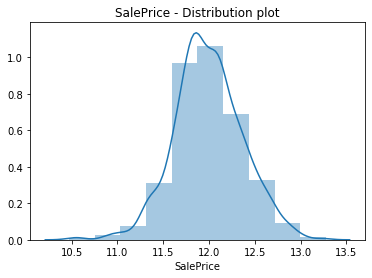

In [32]:
'''
Visualize target variable=SalesPrice

Return the natural logarithm of one plus the input array, element-wise.

Calculates log(1 + x).
'''
plt.title('SalePrice - Distribution plot')
housing['SalePrice'] = np.log1p(housing['SalePrice'])
sns.distplot(housing['SalePrice'], bins=10)
plt.show()

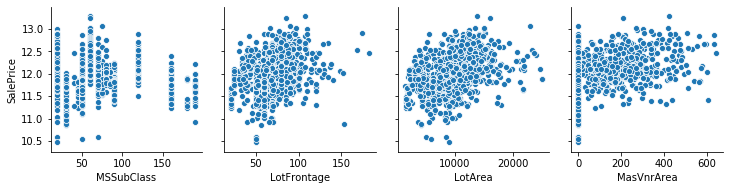

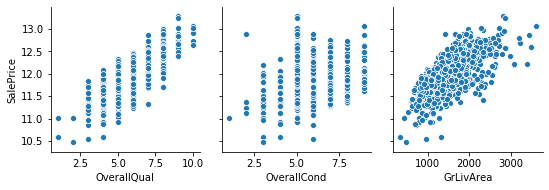

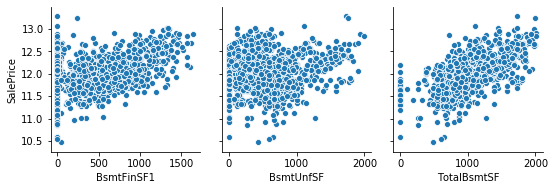

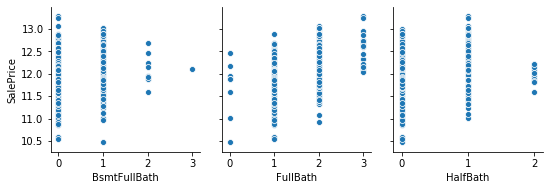

In [33]:
# Check the numerical values using pairplots -1


sns.pairplot(housing, x_vars=['MSSubClass','LotFrontage','LotArea','MasVnrArea'], y_vars='SalePrice',diag_kind='kde')
sns.pairplot(housing, x_vars=['OverallQual', 'OverallCond','GrLivArea'], y_vars='SalePrice',diag_kind='kde')
sns.pairplot(housing, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',diag_kind='kde')
sns.pairplot(housing, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',diag_kind='kde')
plt.show()

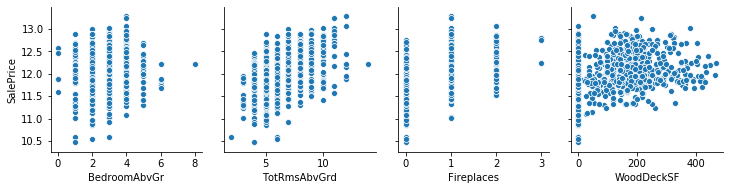

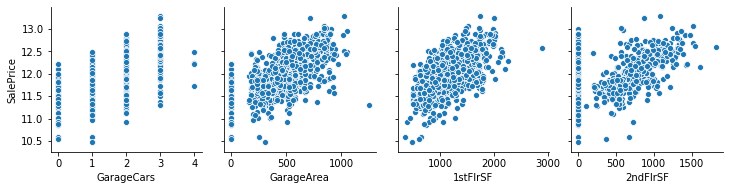

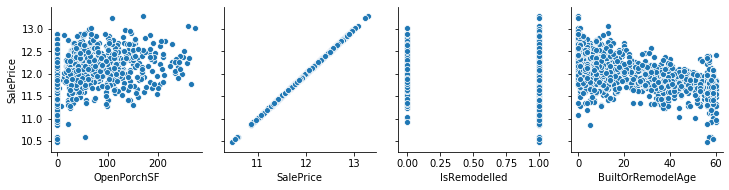

In [34]:
# Check the numerical values using pairplots -2
sns.pairplot(housing, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces','WoodDeckSF'], y_vars='SalePrice',diag_kind='kde')
sns.pairplot(housing, x_vars=['GarageCars','GarageArea','1stFlrSF','2ndFlrSF'], y_vars='SalePrice',diag_kind='kde')
sns.pairplot(housing, x_vars=['OpenPorchSF','SalePrice', 'IsRemodelled','BuiltOrRemodelAge'], y_vars='SalePrice',diag_kind='kde')

plt.show()

#### Identify the Correlation coefficients to see which variables are highly correlated

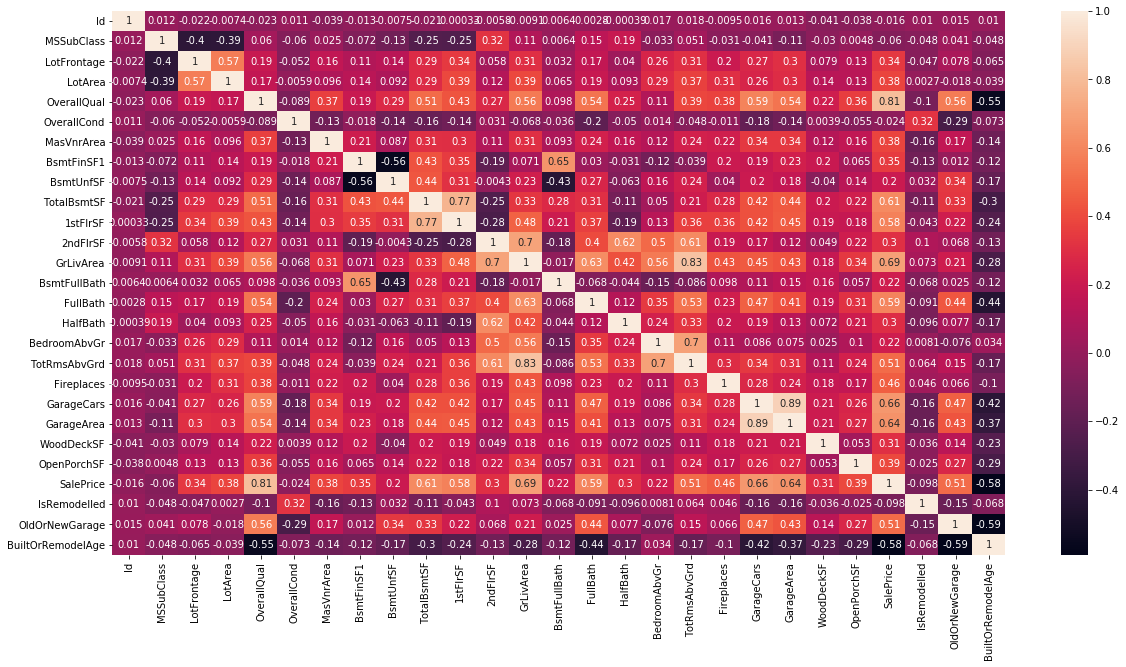

In [35]:
plt.figure(figsize = (20, 10))
sns.heatmap(housing.corr(), annot = True )
plt.show()

#### Remove Highly correlated columns

It is been observed from the above heat map that below mentioned columns show high % correlation
- "GrLivArea" and "TotRmsAbvGrd" show 83 % correlation
- "GarageCars" and "GarageArea" show 89 % correlation

In [36]:
housing.drop(['GarageArea','TotRmsAbvGrd'], axis = 1, inplace = True)

In [37]:
housing.shape

(1358, 47)

<font color='red'>Overall Outcome of Data Visualization:</font>

- With the help of Distribution plot we have observed the salePrice after transforming the variables
- Pair plot has helped us to observe how salePrice is getting effected with oyther attribute of house
-  With the help of  heat map we have eliminated columns with high correlation 

In [38]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,OldOrNewGarage,BuiltOrRemodelAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,0,None,Attchd,RFn,2,0,61,None,Normal,12.247699,0,1,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,1,TA,Attchd,RFn,2,298,0,None,Normal,12.109016,0,0,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,1,TA,Attchd,RFn,2,0,42,None,Normal,12.317171,1,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,1,Gd,Detchd,Unf,3,0,35,None,Abnorml,11.849405,1,0,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,1,TA,Attchd,RFn,3,192,84,None,Normal,12.429220,0,1,8


## 4. Data Preparation
- Create dummies
- Convert categorical variables into numeriacl variables by mapping the attributes
- ordered sequence value for values which can be ordered
- Categorise into 0 and 1 for values which cannot be ordered.

In [39]:
housing['LotShape_d'] = housing['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
housing['ExterQual_d'] = housing['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
housing['BsmtQual_d'] = housing['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing['BsmtExposure_d'] = housing['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
housing['BsmtFinType1_d'] = housing['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
housing['LotConfig_d'] = housing['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
housing['MasVnrType_d'] = housing['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
housing['SaleCondition_d'] = housing['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})  
housing['HeatingQC_d'] = housing['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing['KitchenQual_d'] = housing['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing['FireplaceQu_d'] = housing['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing['GarageFinish_d'] = housing['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
housing['BldgType_d'] = housing['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
housing['HouseStyle_d'] = housing['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
housing['Fence_d'] = housing['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,OldOrNewGarage,BuiltOrRemodelAge,LotShape_d,ExterQual_d,BsmtQual_d,BsmtExposure_d,BsmtFinType1_d,LotConfig_d,MasVnrType_d,SaleCondition_d,HeatingQC_d,KitchenQual_d,FireplaceQu_d,GarageFinish_d,BldgType_d,HouseStyle_d,Fence_d
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,0,None,Attchd,RFn,2,0,61,None,Normal,12.247699,0,1,5,3,4,4,1,6,5,1,1,5,4,0,2,1,4,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,1,TA,Attchd,RFn,2,298,0,None,Normal,12.109016,0,0,31,3,3,4,4,5,2,0,1,5,3,3,2,1,1,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,1,TA,Attchd,RFn,2,0,42,None,Normal,12.317171,1,1,6,2,4,4,2,6,5,1,1,5,4,3,2,1,4,0
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,1,Gd,Detchd,Unf,3,0,35,None,Abnorml,11.849405,1,0,36,2,3,3,1,5,4,0,0,4,4,4,1,1,4,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,1,TA,Attchd,RFn,3,192,84,None,Normal,12.429220,0,1,8,2,4,4,3,6,2,1,1,5,4,3,2,1,4,0


1. Drop ID attribute as it has no significance
2. Dropping the old columns from which the new columns were derived

In [40]:
housing = housing.drop(['Id', 'MasVnrType','LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig',  'SaleCondition'], axis=1)

In [41]:
print(housing.shape)
housing.head()

(1358, 46)


,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageType,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,OldOrNewGarage,BuiltOrRemodelAge,LotShape_d,ExterQual_d,BsmtQual_d,BsmtExposure_d,BsmtFinType1_d,LotConfig_d,MasVnrType_d,SaleCondition_d,HeatingQC_d,KitchenQual_d,FireplaceQu_d,GarageFinish_d,BldgType_d,HouseStyle_d,Fence_d
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,196.0,PConc,706,150,856,856,854,1710,1,2,1,3,0,Attchd,2,0,61,12.247699,0,1,5,3,4,4,1,6,5,1,1,5,4,0,2,1,4,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,0.0,CBlock,978,284,1262,1262,0,1262,0,2,0,3,1,Attchd,2,298,0,12.109016,0,0,31,3,3,4,4,5,2,0,1,5,3,3,2,1,1,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,162.0,PConc,486,434,920,920,866,1786,1,2,1,3,1,Attchd,2,0,42,12.317171,1,1,6,2,4,4,2,6,5,1,1,5,4,3,2,1,4,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,0.0,BrkTil,216,540,756,961,756,1717,1,1,0,3,1,Detchd,3,0,35,11.849405,1,0,36,2,3,3,1,5,4,0,0,4,4,4,1,1,4,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,350.0,PConc,655,490,1145,1145,1053,2198,1,2,1,4,1,Attchd,3,192,84,12.429220,0,1,8,2,4,4,3,6,2,1,1,5,4,3,2,1,4,0


#### Create Dummies

In [42]:
# Creating dummies for Exterior2nd

d_Exterior2nd = pd.get_dummies(housing['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
housing = pd.concat([housing, d_Exterior2nd], axis = 1)

# Creating dummies for Foundation

d_Foundation = pd.get_dummies(housing['Foundation'], prefix='Foundation', drop_first = True)
housing = pd.concat([housing, d_Foundation], axis = 1)

# Creating dummies for GarageType

d_GarageType = pd.get_dummies(housing['GarageType'], prefix='GarageType', drop_first = True)
housing = pd.concat([housing, d_GarageType], axis = 1)

housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageType,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,OldOrNewGarage,BuiltOrRemodelAge,LotShape_d,ExterQual_d,BsmtQual_d,BsmtExposure_d,BsmtFinType1_d,LotConfig_d,MasVnrType_d,SaleCondition_d,HeatingQC_d,KitchenQual_d,FireplaceQu_d,GarageFinish_d,BldgType_d,HouseStyle_d,Fence_d,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,196.0,PConc,706,150,856,856,854,1710,1,2,1,3,0,Attchd,2,0,61,12.247699,0,1,5,3,4,4,1,6,5,1,1,5,4,0,2,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,0.0,CBlock,978,284,1262,1262,0,1262,0,2,0,3,1,Attchd,2,298,0,12.109016,0,0,31,3,3,4,4,5,2,0,1,5,3,3,2,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,162.0,PConc,486,434,920,920,866,1786,1,2,1,3,1,Attchd,2,0,42,12.317171,1,1,6,2,4,4,2,6,5,1,1,5,4,3,2,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,0.0,BrkTil,216,540,756,961,756,1717,1,1,0,3,1,Detchd,3,0,35,11.849405,1,0,36,2,3,3,1,5,4,0,0,4,4,4,1,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,350.0,PConc,655,490,1145,1145,1053,2198,1,2,1,4,1,Attchd,3,192,84,12.429220,0,1,8,2,4,4,3,6,2,1,1,5,4,3,2,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


#### Creating dummies for MSZoning #Neighborhood #RoofStyle #Exterior1st

In [43]:
d_MSZoning = pd.get_dummies(housing['MSZoning'], prefix='MSZoning', drop_first = True)
housing = pd.concat([housing, d_MSZoning], axis = 1)

d_Neighborhood = pd.get_dummies(housing['Neighborhood'], prefix='Neighborhood', drop_first = True)
housing = pd.concat([housing, d_Neighborhood], axis = 1)

d_RoofStyle = pd.get_dummies(housing['RoofStyle'], prefix='RoofStyle', drop_first = True)
housing = pd.concat([housing, d_RoofStyle], axis = 1)

d_Exterior1st = pd.get_dummies(housing['Exterior1st'], prefix='Exterior1st', drop_first = True)
housing = pd.concat([housing, d_Exterior1st], axis = 1)
               
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageType,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,OldOrNewGarage,BuiltOrRemodelAge,LotShape_d,ExterQual_d,BsmtQual_d,BsmtExposure_d,BsmtFinType1_d,LotConfig_d,MasVnrType_d,SaleCondition_d,HeatingQC_d,KitchenQual_d,FireplaceQu_d,GarageFinish_d,BldgType_d,HouseStyle_d,Fence_d,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,196.0,PConc,706,150,856,856,854,1710,1,2,1,3,0,Attchd,2,0,61,12.247699,0,1,5,3,4,4,1,6,5,1,1,5,4,0,2,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,0.0,CBlock,978,284,1262,1262,0,1262,0,2,0,3,1,Attchd,2,298,0,12.109016,0,0,31,3,3,4,4,5,2,0,1,5,3,3,2,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,162.0,PConc,486,434,920,920,866,1786,1,2,1,3,1,Attchd,2,0,42,12.317171,1,1,6,2,4,4,2,6,5,1,1,5,4,3,2,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,0.0,BrkTil,216,540,756,961,756,1717,1,1,0,3,1,Detchd,3,0,35,11.849405,1,0,36,2,3,3,1,5,4,0,0,4,4,4,1,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,350.0,PConc,655,490,1145,1145,1053,2198,1,2,1,4,1,Attchd,3,192,84,12.429220,0,1,8,2,4,4,3,6,2,1,1,5,4,3,2,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [44]:
housing.shape

(1358, 119)

#### Drop the below columns as we now have new columns derived from these columns

In [45]:
housing = housing.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)

housing.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,OldOrNewGarage,BuiltOrRemodelAge,LotShape_d,ExterQual_d,BsmtQual_d,BsmtExposure_d,BsmtFinType1_d,LotConfig_d,MasVnrType_d,SaleCondition_d,HeatingQC_d,KitchenQual_d,FireplaceQu_d,GarageFinish_d,BldgType_d,HouseStyle_d,Fence_d,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,65.0,8450,7,5,196.0,706,150,856,856,854,1710,1,2,1,3,0,2,0,61,12.247699,0,1,5,3,4,4,1,6,5,1,1,5,4,0,2,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,0,1262,0,2,0,3,1,2,298,0,12.109016,0,0,31,3,3,4,4,5,2,0,1,5,3,3,2,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,866,1786,1,2,1,3,1,2,0,42,12.317171,1,1,6,2,4,4,2,6,5,1,1,5,4,3,2,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,756,1717,1,1,0,3,1,3,0,35,11.849405,1,0,36,2,3,3,1,5,4,0,0,4,4,4,1,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,1053,2198,1,2,1,4,1,3,192,84,12.429220,0,1,8,2,4,4,3,6,2,1,1,5,4,3,2,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [46]:
print(housing.shape)
housing.head()

(1358, 112)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,OldOrNewGarage,BuiltOrRemodelAge,LotShape_d,ExterQual_d,BsmtQual_d,BsmtExposure_d,BsmtFinType1_d,LotConfig_d,MasVnrType_d,SaleCondition_d,HeatingQC_d,KitchenQual_d,FireplaceQu_d,GarageFinish_d,BldgType_d,HouseStyle_d,Fence_d,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,65.0,8450,7,5,196.0,706,150,856,856,854,1710,1,2,1,3,0,2,0,61,12.247699,0,1,5,3,4,4,1,6,5,1,1,5,4,0,2,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,0,1262,0,2,0,3,1,2,298,0,12.109016,0,0,31,3,3,4,4,5,2,0,1,5,3,3,2,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,866,1786,1,2,1,3,1,2,0,42,12.317171,1,1,6,2,4,4,2,6,5,1,1,5,4,3,2,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,756,1717,1,1,0,3,1,3,0,35,11.849405,1,0,36,2,3,3,1,5,4,0,0,4,4,4,1,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,1053,2198,1,2,1,4,1,3,192,84,12.429220,0,1,8,2,4,4,3,6,2,1,1,5,4,3,2,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [47]:
#information
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Columns: 112 entries, MSSubClass to Exterior1st_WdShing
dtypes: float64(3), int64(36), uint8(73)
memory usage: 521.2 KB


<font color='red'>Outcome of Data preparation: </font>

- All the columns are now numeric data type
- dummy variables have been created 

## 5. Data modelling

###  Scaling the feature 
- Placing all the variables into X and response variables into y

In [48]:
X = housing.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,IsRemodelled,OldOrNewGarage,BuiltOrRemodelAge,LotShape_d,ExterQual_d,BsmtQual_d,BsmtExposure_d,BsmtFinType1_d,LotConfig_d,MasVnrType_d,SaleCondition_d,HeatingQC_d,KitchenQual_d,FireplaceQu_d,GarageFinish_d,BldgType_d,HouseStyle_d,Fence_d,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,65.0,8450,7,5,196.0,706,150,856,856,854,1710,1,2,1,3,0,2,0,61,0,1,5,3,4,4,1,6,5,1,1,5,4,0,2,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,0,1262,0,2,0,3,1,2,298,0,0,0,31,3,3,4,4,5,2,0,1,5,3,3,2,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,866,1786,1,2,1,3,1,2,0,42,1,1,6,2,4,4,2,6,5,1,1,5,4,3,2,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,756,1717,1,1,0,3,1,3,0,35,1,0,36,2,3,3,1,5,4,0,0,4,4,4,1,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,1053,2198,1,2,1,4,1,3,192,84,0,1,8,2,4,4,3,6,2,1,1,5,4,3,2,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [49]:
# storing column names in cols
cols = X.columns

X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc',
       'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone',
       'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior1st_WdShing'],
      dtype='object', length=111)

In [50]:
y = housing['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

#### Split data into training and test dataset

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state=100)
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,IsRemodelled,OldOrNewGarage,BuiltOrRemodelAge,LotShape_d,ExterQual_d,BsmtQual_d,BsmtExposure_d,BsmtFinType1_d,LotConfig_d,MasVnrType_d,SaleCondition_d,HeatingQC_d,KitchenQual_d,FireplaceQu_d,GarageFinish_d,BldgType_d,HouseStyle_d,Fence_d,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
28,-0.878923,-1.121052,1.904952,-0.775908,0.365250,-0.625900,2.098965,-0.817830,1.234699,1.389545,-0.797204,0.281962,1.157858,-1.008133,-0.738312,-1.052862,2.280324,-0.988725,1.867356,3.894837,1.051393,-0.617645,-0.685211,-1.095792,-0.669548,-0.519513,2.354124,0.238333,-2.086716,-0.800060,0.323981,-1.185343,-0.750669,1.261451,0.36563,-0.423422,-0.849638,-0.461766,-0.047053,-0.071982,-0.125327,-0.027146,-0.201527,-0.410700,-0.07698,2.37158,-0.027146,-0.321198,-0.054353,-0.134131,-0.733443,-0.388391,-0.16265,1.129029,-0.875174,-0.134131,-0.060791,-0.047053,0.840256,-0.119121,-0.245172,-0.08168,-0.616507,-0.24853,-0.215,-0.10919,0.526798,-0.427699,-0.038405,-0.10919,-0.205451,-0.1159,-0.351059,-0.195515,-0.275807,-0.246855,-0.16502,-0.105684,-0.185129,2.318531,-0.08168,-0.233126,-0.134131,-0.216868,-0.293939,-0.136948,-0.234877,-0.209314,-0.250196,-0.125327,-0.155347,-0.08613,0.493548,-0.090368,-0.462151,-0.071982,-0.038405,-0.027146,-0.038405,-0.182991,-0.027146,-0.201527,-0.428903,-0.027146,2.331527,-0.277350,-0.038405,-0.131257,-0.746552,-0.392149,-0.136948
325,-0.878923,0.011754,2.258773,-0.017863,-0.526853,-0.402041,2.081905,-0.815499,1.218810,1.030810,-0.797204,0.020349,1.157858,0.841927,-0.738312,0.182909,2.280324,0.367526,-0.779977,-0.027038,-0.951120,-0.617645,1.236549,-1.095792,-0.669548,-0.519513,-0.564531,0.238333,0.527454,1.249906,0.323981,0.901106,-0.750669,1.261451,-0.76799,-0.423422,-0.849638,-0.461766,-0.047053,-0.071982,-0.125327,-0.027146,-0.201527,-0.410700,-0.07698,-0.42166,-0.027146,-0.321198,-0.054353,-0.134131,-0.733443,2.574726,-0.16265,1.129029,-0.875174,-0.134131,-0.060791,-0.047053,0.840256,-0.119121,-0.245172,-0.08168,-0.616507,-0.24853,-0.215,-0.10919,0.526798,-0.427699,-0.038405,-0.10919,-0.205451,-0.1159,-0.351059,-0.195515,-0.275807,-0.246855,-0.16502,-0.105684,-0.185129,2.318531,-0.08168,-0.233126,-0.134131,-0.216868,-0.293939,-0.136948,-0.234877,-0.209314,-0.250196,-0.125327,-0.155347,-0.08613,0.493548,-0.090368,-0.462151,-0.071982,-0.038405,-0.027146,-0.038405,-0.182991,-0.027146,-0.201527,-0.428903,-0.027146,-0.428903,-0.277350,-0.038405,-0.131257,-0.746552,2.550051,-0.136948
811,-0.4058

In [52]:
X_train.shape

(950, 111)

### 5.1. RFE - Feature ranking with recursive feature elimination.

- the goal is to select features by recursively considering smaller and smaller sets of features.
- That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

#### Create linear regression model and try to fit the model 

In [187]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [188]:
# Running the RFE
rfe = RFE(lr,50)
rfe = rfe.fit(X_train, y_train)

In [189]:
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'Fireplaces', 'GarageCars',
       'WoodDeckSF', 'OpenPorchSF', 'IsRemodelled', 'OldOrNewGarage',
       'BuiltOrRemodelAge', 'BsmtQual_d', 'BsmtExposure_d', 'BsmtFinType1_d',
       'SaleCondition_d', 'HeatingQC_d', 'KitchenQual_d', 'GarageFinish_d',
       'BldgType_d', 'Exterior2nd_CBlock', 'Exterior2nd_Stucco',
       'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'Foundation_Stone', 'GarageType_Attchd', 'GarageType_BuiltIn',
       'GarageType_Detchd', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_StoneBr', 'Exterior1st_BrkFace',
       'Exterior1st_Stucco', 'Exterior1st_

In [191]:
# View the 50 features selected using RFE

df1 = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Feature', 'rfe_support', 'rfe_ranking'])
df1 = df1.loc[df1['rfe_support'] == True]
df1.reset_index(drop=True, inplace=True)
df1

,Feature,rfe_support,rfe_ranking
0,LotFrontage,True,1
1,LotArea,True,1
2,OverallQual,True,1
3,OverallCond,True,1
4,BsmtFinSF1,True,1
5,TotalBsmtSF,True,1
6,GrLivArea,True,1
7,BsmtFullBath,True,1
8,Fireplaces,True,1
9,GarageCars,True,1


In [192]:
# Assign the 50 columns to X_train_rfe

X_train_rfe = X_train[col]

# Associate the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

### 6. Model building and evaluation
- Step 1 - Apply the Ridge regression - with below list of alphas 
- Step 2 - Apply grid search cross validation with 5 folds - for each of 27 candidates, totalling 135 fits


In [193]:
# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# Grid search cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    1.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

#### - Step 3 - Observe the mean score of cross validation result,sorting the columns by rank_test_score
##### - Lambda value 0.0001 selected as best estimator

In [194]:
# Display the mean score and identify the best estimator

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,-0.072608,-0.077247,1
1,0.001,-0.072607,-0.077247,2
2,0.01,-0.072607,-0.077248,3
3,0.1,-0.072607,-0.077248,4
4,0.2,-0.072607,-0.077249,5
5,0.3,-0.072606,-0.077250,6
6,0.4,-0.072605,-0.077251,7
7,0.5,-0.072606,-0.077252,8
8,0.6,-0.072608,-0.077254,9
9,0.7,-0.072610,-0.077256,10


#### Step 4 - Plotting mean test and train scoes with alpha 

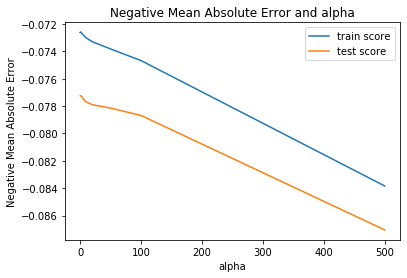

In [195]:
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

#### Best estimator - aplha value is 0.0001

In [196]:
ridge_model_cv.best_estimator_

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

#### step 5 - Identify the  coeficient by fitting the model with lambda =0.0001

In [197]:
alpha = 0.0001
#alpha = 0.0002
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.00867235,  0.01652993,  0.07252459,  0.03648086,  0.02159894,
        0.03862557,  0.11282167,  0.01023527,  0.01227277,  0.04015366,
        0.01076847,  0.00975205, -0.01748202,  0.01340013, -0.02733558,
        0.01527865,  0.01300564,  0.00978549,  0.01582202,  0.01690572,
        0.01557881,  0.01257084, -0.01855295, -0.00299719, -0.01281651,
        0.02866869,  0.01233505, -0.00719018,  0.01916883,  0.03919937,
        0.01277233,  0.01087287,  0.02436465,  0.01349217,  0.01429728,
        0.08583944,  0.03425836,  0.14532528,  0.11419334,  0.01987085,
       -0.01016207, -0.01272526, -0.00648588,  0.02280222, -0.02171282,
        0.01291358,  0.01147677,  0.01491295, -0.04156977, -0.02214097])

#### step 6 - Identify the mean square error value i.e. 0.01590437886347043

In [198]:
round(mean_squared_error(y_test, ridge.predict(X_test)),6)

0.015904

In [199]:
#Display the feature Coefficient
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
#selecting the top 5 variables
ridge_df.head(5)

,Features,Coefficient
0,LotFrontage,0.0087
1,LotArea,0.0165
2,OverallQual,0.0725
3,OverallCond,0.0365
4,BsmtFinSF1,0.0216


In [200]:
model_param = list(ridge.coef_)
model_param.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
ridge_coef.columns = ['Feature','Coef','mod']
ridge_coef.sort_values(by='mod',ascending=False).head()

,Feature,Coef,mod
0,LotFrontage,11.991198,11.991198
38,MSZoning_RM,0.145325,0.145325
39,Neighborhood_Crawfor,0.114193,0.114193
7,BsmtFullBath,0.112822,0.112822
36,MSZoning_RH,0.085839,0.085839


In [201]:
#Assign the Features and their coefficient values to a dictionary

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'LotFrontage': 0.0087,
 'LotArea': 0.0165,
 'OverallQual': 0.0725,
 'OverallCond': 0.0365,
 'BsmtFinSF1': 0.0216,
 'TotalBsmtSF': 0.0386,
 'GrLivArea': 0.1128,
 'BsmtFullBath': 0.0102,
 'Fireplaces': 0.0123,
 'GarageCars': 0.0402,
 'WoodDeckSF': 0.0108,
 'OpenPorchSF': 0.0098,
 'IsRemodelled': -0.0175,
 'OldOrNewGarage': 0.0134,
 'BuiltOrRemodelAge': -0.0273,
 'BsmtQual_d': 0.0153,
 'BsmtExposure_d': 0.013,
 'BsmtFinType1_d': 0.0098,
 'SaleCondition_d': 0.0158,
 'HeatingQC_d': 0.0169,
 'KitchenQual_d': 0.0156,
 'GarageFinish_d': 0.0126,
 'BldgType_d': -0.0186,
 'Exterior2nd_CBlock': -0.003,
 'Exterior2nd_Stucco': -0.0128,
 'Exterior2nd_VinylSd': 0.0287,
 'Exterior2nd_Wd Sdng': 0.0123,
 'Exterior2nd_Wd Shng': -0.0072,
 'Foundation_CBlock': 0.0192,
 'Foundation_PConc': 0.0392,
 'Foundation_Slab': 0.0128,
 'Foundation_Stone': 0.0109,
 'GarageType_Attchd': 0.0244,
 'GarageType_BuiltIn': 0.0135,
 'GarageType_Detchd': 0.0143,
 'MSZoning_FV': 0.0858,
 'MSZoning_RH': 0.0343,
 'MSZoning_RL': 0

#### Step 7 - RFE to minimize the feature to 15

In [202]:
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [203]:
df2 = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
df2 = df2.loc[df2['rfe_support'] == True]
df2.reset_index(drop=True, inplace=True)

#Get the Coefficient values
df2['Coefficient'] = df2['Features'].apply(lambda x:ridge_coeff_dict[x])
df2 = df2.sort_values(by=['Coefficient'], ascending=False)
df2 = df2.head(10)
df2

,Features,rfe_support,rfe_ranking,Coefficient
12,MSZoning_RL,True,1,0.1453
13,MSZoning_RM,True,1,0.1142
4,GrLivArea,True,1,0.1128
10,MSZoning_FV,True,1,0.0858
0,OverallQual,True,1,0.0725
5,GarageCars,True,1,0.0402
9,Foundation_PConc,True,1,0.0392
3,TotalBsmtSF,True,1,0.0386
1,OverallCond,True,1,0.0365
11,MSZoning_RH,True,1,0.0343


In [204]:
#R2 score of train and test data after ridge regression
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print("Ridge Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Ridge Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Ridge Regression train r2: 0.9248630126674325
Ridge Regression test r2: 0.8921884464857228


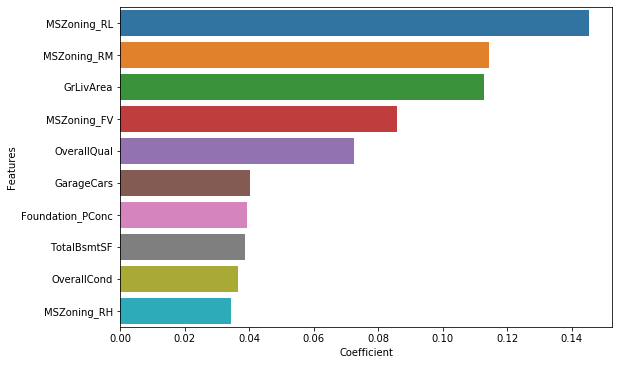

In [205]:
plt.figure(figsize=(30,20))
plt.subplot(3,3,1)
sns.barplot(y = 'Features', x='Coefficient',data = df2)
plt.show()

### <font color='red'>Outcome of Ridge regression </font>

- Bar plot to determine the variables that would effect pricing most using ridge regression
- Below are the TOP 10 features which play important role in determining/predicting the price of the house

## 6.1 - Lasso regression

In [218]:
lasso = Lasso()

# list of lambda values
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# Grid search cross validation - folds=5

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [219]:
# display the mean scores
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,-0.072618,-0.077326,1
1,0.0002,-0.072680,-0.077470,2
2,0.0003,-0.072767,-0.077593,3
3,0.0004,-0.072878,-0.077764,4
4,0.0005,-0.073036,-0.077964,5
5,0.001,-0.073864,-0.078842,6
6,0.002,-0.074802,-0.079475,7
7,0.003,-0.075277,-0.079669,8
8,0.004,-0.075840,-0.080096,9
9,0.005,-0.076440,-0.080780,10


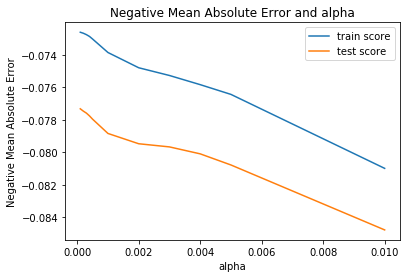

In [220]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [221]:
lasso_model_cv.best_estimator_

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [222]:
alpha = 0.0001
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.00865725,  0.01635152,  0.07325358,  0.03671837,  0.02182863,
        0.03861862,  0.11262312,  0.01007714,  0.01243628,  0.04026842,
        0.01069482,  0.009722  , -0.01766779,  0.01317613, -0.02736983,
        0.01485221,  0.01284191,  0.00973711,  0.01614966,  0.01678902,
        0.01570572,  0.01262269, -0.01825157, -0.00291063, -0.01235429,
        0.02394494,  0.01109395, -0.00739789,  0.01785138,  0.03800885,
        0.01223312,  0.0099292 ,  0.02369772,  0.01310837,  0.01351351,
        0.08098812,  0.03170795,  0.13594464,  0.10537197,  0.01973941,
       -0.00991361, -0.01244992, -0.00632032,  0.02249113, -0.02146556,
        0.01261369,  0.01148875,  0.01438706, -0.0365877 , -0.02092567])

In [223]:
round(mean_squared_error(y_test, lasso.predict(X_test)),6)

0.015843

In [224]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']
lasso_coef.sort_values(by='mod',ascending=False).head()

,Feature,Coef,mod
0,LotFrontage,11.991148,11.991148
38,MSZoning_RM,0.135945,0.135945
7,BsmtFullBath,0.112623,0.112623
39,Neighborhood_Crawfor,0.105372,0.105372
36,MSZoning_RH,0.080988,0.080988


In [225]:
# Put the Features and Coefficients in dictionary
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'LotFrontage': 0.00865724893781089,
 'LotArea': 0.0163515191517532,
 'OverallQual': 0.07325357667927394,
 'OverallCond': 0.036718366061164354,
 'BsmtFinSF1': 0.021828627267507835,
 'TotalBsmtSF': 0.038618620130579547,
 'GrLivArea': 0.11262312427540122,
 'BsmtFullBath': 0.010077140301065029,
 'Fireplaces': 0.012436275722270292,
 'GarageCars': 0.04026841903379787,
 'WoodDeckSF': 0.010694817768165443,
 'OpenPorchSF': 0.009722000154586389,
 'IsRemodelled': -0.01766779091197652,
 'OldOrNewGarage': 0.013176128938875493,
 'BuiltOrRemodelAge': -0.027369830720237603,
 'BsmtQual_d': 0.014852213620139004,
 'BsmtExposure_d': 0.012841907331356749,
 'BsmtFinType1_d': 0.009737109257403566,
 'SaleCondition_d': 0.016149661506267867,
 'HeatingQC_d': 0.016789021980853587,
 'KitchenQual_d': 0.01570571958163881,
 'GarageFinish_d': 0.01262268526598263,
 'BldgType_d': -0.0182515688734413,
 'Exterior2nd_CBlock': -0.002910629432068721,
 'Exterior2nd_Stucco': -0.0123542875668006,
 'Exterior2nd_VinylSd': 0.0239

In [226]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [227]:
# Assign top 10 features to a df2 dataframe for further display in the bar plot

df2 = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
df2 = df2.loc[df2['rfe_support'] == True]
df2.reset_index(drop=True, inplace=True)

df2['Coefficient'] = df2['Features'].apply(lambda x:lasso_coeff_dict[x])
df2 = df2.sort_values(by=['Coefficient'], ascending=False)
df2.head()

,Features,rfe_support,rfe_ranking,Coefficient
12,MSZoning_RL,True,1,0.135945
4,GrLivArea,True,1,0.112623
13,MSZoning_RM,True,1,0.105372
10,MSZoning_FV,True,1,0.080988
0,OverallQual,True,1,0.073254


In [228]:
#R2 score of train and test data after lasso regression
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

lasso Regression train r2: 0.9248290906812663
lasso Regression test r2: 0.8926012171388997


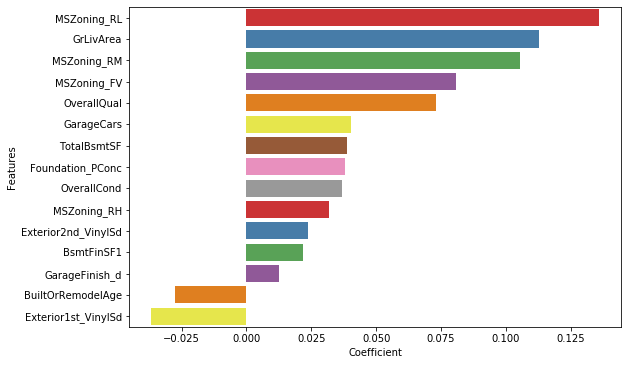

In [229]:
plt.figure(figsize=(30,20))
plt.subplot(3,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = df2)
plt.show()

<font color='red'>Outcome of lasso regression</font>

- The optimal lambda value in case of Ridge and Lasso is as below:

> - Ridge - 0.0001
> -  Lasso - 0.0001

- The Mean Squared error in case of Ridge and Lasso are:

> -  Ridge - 0.015904
> - Lasso - 0.015843

<font color='blue'>The MSE - Mean Squared Error of Lasso is slightly lower than that of Ridge</font>

- Lasso has a better edge over Ridge 
- As it helps feature reduction because one of the coefficient value became 0

<font color='blue'> Based on Lasso</font>
- The factors that generally affect the price are the following:
> 1. Zoning classification - Residential Low Density, Medium Density and Floating Village Residential
> 2. Above grade (ground) living area square feet
> 3. Overall quality and condition of the house
> 4. Foundation type of the house - Poured Contrete
> 5. Number of cars that can be accomodated in the garage
> 6. Total basement area in square feet and the Basement finished square feet area

## <font color='red'>Hence the variables predicted by Lasso in the above bar chart as significant variables for predicting the price of a house.</font>

#### ---------------------------------------------------------END of assignment code-----------------------------------------------
#### Subjective - Question 3
After building the model, you realized that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


In [230]:
X_train_new = X_train.drop(['LotFrontage','MSZoning_RM','BsmtFullBath','Neighborhood_Crawfor','MSZoning_RH'],axis=1)

X_test_new = X_test.drop(['LotFrontage','MSZoning_RM','BsmtFullBath','Neighborhood_Crawfor','MSZoning_RH'],axis=1)

In [231]:
X_test_new.head()
X_train_new.shape

(950, 45)

In [232]:
X_test_new.shape

(408, 45)

In [233]:
lasso_modified = Lasso()
param = {'alpha': [0.0001, 0.001, 0.01]}
folds = 5
# cross validation
lasso_cv_model_modified = GridSearchCV(estimator = lasso, 
                        param_grid = param, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv_model_modified.fit(X_train_new, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=0.0001, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [234]:
#Creating the results dataframe.
lasso_cv_modified_results = pd.DataFrame(lasso_cv_model_modified.cv_results_)
#reading the results
lasso_cv_modified_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006397,0.001366,0.001002,0.000001,0.0001,{'alpha': 0.0001},-0.085860,-0.072469,-0.085382,-0.073641,-0.079423,-0.079355,0.005634,1,-0.073111,-0.077783,-0.072606,-0.076582,-0.075232,-0.075063,0.001979
1,0.004202,0.000400,0.001002,0.000003,0.001,{'alpha': 0.001},-0.087559,-0.073316,-0.086488,-0.074592,-0.078985,-0.080188,0.005899,2,-0.073756,-0.078102,-0.073305,-0.076795,-0.075925,-0.075577,0.001814
2,0.003401,0.000490,0.000997,0.000011,0.01,{'alpha': 0.01},-0.094948,-0.079827,-0.092304,-0.080324,-0.080926,-0.085666,0.006562,3,-0.079460,-0.083921,-0.079719,-0.082904,-0.082604,-0.081722,0.001796


In [235]:
lasso_cv_model_modified.best_params_

{'alpha': 0.0001}

In [236]:
# After performing grid search we found the same alpha that ue use before
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train_new,y_train)

y_train_pred = lasso.predict(X_train_new)
y_test_pred = lasso.predict(X_test_new)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso Regression train r2: 0.9183336067259137
Lasso Regression test r2: 0.8832851310613401


In [237]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train_new.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']
lasso_coef.sort_values(by='mod',ascending=False).head(5)

,Feature,Coef,mod
0,LotArea,11.991220,11.991220
6,Fireplaces,0.115443,0.115443
2,OverallCond,0.077439,0.077439
3,BsmtFinSF1,0.043501,0.043501
5,GrLivArea,0.040532,0.040532
